## Ordinary differential equations

Documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

### Exercise. Solve ODE with Euler, midpoint and 4th order Runge-Kutta methods.

1) Implement Euler, midpoint and the 4th order RK methods. 

2) Use them to solve the equation $\dot{x} = - x^3 + sin(t)$

3) Plot and compare the solutions

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def rk1(f,specs):
    # Solve ODE with Euler method
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = specs['x0']
    xt = [x]
    ts = np.arange(specs['t0'],specs['t1'],h)
    for i in range(len(ts)):
        t = ts[i]
        x += h*f(x,t)
        xt.append(x)
        
    return ts, xt[:-1]

In [3]:
def rk2(f,specs):
    # Solve ODE with midpoint method
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = specs['x0']
    xt = [x]
    ts = np.arange(specs['t0'],specs['t1'],h)
    for t in ts:
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        x += k2
        xt.append(x)
    
    return ts, xt[:-1]

In [4]:
def rk4(f,specs):
     # Solve ODE with 4th order Runge Kutta method
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = specs['x0']
    xt = []
    xt.append(x)
    ts = np.arange(specs['t0'],specs['t1'],h)
    for t in ts:
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x + k3, t + h)
        x += (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        xt.append(x)
    
    return ts, xt[:-1]

In [5]:
specs = {'x0':0., 't0':0., 't1':100., 'N': 10000}
print(specs.items())
print(specs.keys())
print(specs.values())
print(specs['t0'])

def f(x,t): return -x**3 + np.sin(t)

dict_items([('x0', 0.0), ('t0', 0.0), ('t1', 100.0), ('N', 10000)])
dict_keys(['x0', 't0', 't1', 'N'])
dict_values([0.0, 0.0, 100.0, 10000])
0.0


In [6]:
t1, xt1 = rk1(f,specs)
t2, xt2 = rk2(f,specs)
t3, xt3 = rk4(f,specs)

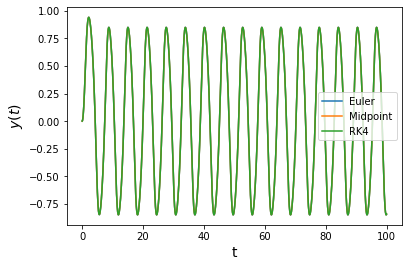

In [7]:
plt.plot(t1,xt1,label='Euler')
plt.plot(t2,xt2,label='Midpoint')
plt.plot(t3,xt3,label='RK4')
plt.xlabel('t',size=14)
plt.ylabel('$y(t)$', size = 14)
#plt.xlim(0,10)
plt.legend()
plt.show()

### Exercise. Systems.

1) Modify the previous codes to solve systems of equations. 

2) Use the new codes to solve the system

   ${dx/dt} = xy - x$

   $dy/dt = y - xy + sin^2(\omega t)$, 
   
   with $\omega = 1$.

In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [9]:
def rk1(f,specs):
    # Solve ODE with Euler method
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = np.array(specs['x0'],dtype='float')
    Nequations = x.size
    xt = np.zeros((specs['N']+1,Nequations),dtype='float')
    xt[0,:] = x
    ts = np.arange(specs['t0'],specs['t1'],h)
    for i in range(len(ts)):
        t = ts[i]
        x += h*np.array(f(x,t))
        xt[i+1,:] = x
        
    return ts, xt[:-1]

In [10]:
def rk2(f,specs):
    # Solve ODE with midpoint method
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = np.array(specs['x0'],dtype='float')
    Nequations = x.size
    xt = np.zeros((specs['N']+1,Nequations),dtype='float')
    xt[0,:] = x
    ts = np.arange(specs['t0'],specs['t1'],h)
    for i in range(len(ts)):
        t = ts[i]
        k1 = h*np.array(f(x,t))
        k2 = h*np.array(f(x+0.5*k1,t+0.5*h))
        x += k2
        xt[i+1,:] = x
        
    return ts, xt[:-1]

In [11]:
import numpy as np

def rk4(f,specs):
    # Solve ODE with 4th order Runge-Kutta
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = np.array(specs['x0'],dtype='float')
    Nequations = x.size
    xt = np.zeros((specs['N']+1,Nequations),dtype='float')
    xt[0,:] = x
    ts = np.arange(specs['t0'],specs['t1'],h)
    for i in range(len(ts)):
        t = ts[i]
        k1 = h*np.array(f(x,t))
        k2 = h*np.array(f(x+0.5*k1,t+0.5*h))
        k3 = h*np.array(f(x+0.5*k2,t+0.5*h))
        k4 = h*np.array(f(x + k3, t + h))
        x += (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        xt[i+1,:] = x
        
    return ts, xt[:-1]

In [12]:
specs = {'x0': [1. ,1.], 't0':0., 't1':10., 'N': 100}

def f(x,t):
    x1 = x[0]
    x2 = x[1]
    omega = 1.0
    f1 = x1*x2 - x1
    f2 = x2 - x1*x2 + np.sin(omega*t)**2
    return np.array([f1,f2],dtype='float')

In [13]:
t1, xt1 = rk1(f,specs)
t2, xt2 = rk2(f,specs)
t3, xt3 = rk4(f,specs)

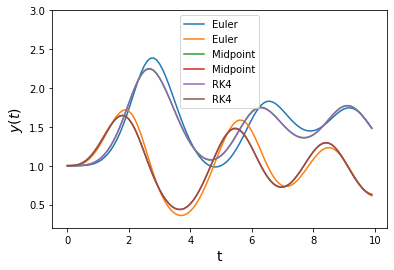

In [14]:
plt.plot(t1,xt1,label='Euler')
plt.plot(t2,xt2,label='Midpoint')
plt.plot(t3,xt3,label='RK4')
plt.xlabel('t',size=14)
plt.ylabel('$y(t)$', size = 14)
plt.ylim(0.2,3)
plt.legend()
plt.show()

### Exercise. Solve single ODE with adaptive step RK4. 

1) Implement adaptive step on rk4. 

2) Test your new code by solving $\dot{x} = -(1 + x^3) + [\tan(\sin(t))]^4$, with $x_0 = 0$, $t_0 = 0$, $t_1 = 10$.

3) Check the point spacing in the solution with a scatter plot 

In [15]:
# Adaptive step for single equation

def ark4_scalar(f,specs): 
    # Solve single ODE with 4th order Runge-Kutta,
    # with adapative step
    ####
    def increment(f,x,t,h):
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x + k3, t + h)
        delta = (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        return delta
    # Solve ODE with 4th order Runge Kutta method
    h = specs['h0']
    x = specs['x0']
    xt = []
    ts = []
    t = specs['t0']
    xt.append(x)
    ts.append(t) 
    t_end = specs['t1']
    while t < t_end:
        x1 = x + increment(f,x,t,h)
        x1 += increment(f,x1,t+h,h)
        x2 = x + increment(f,x,t,2*h)
        eps = (abs(x2-x1))/30.
        if (eps <= 1e-60):
            # Avoid overflow in rho
            rho = 1.0
        else:
            rho = (specs['tol']*h)/eps
        # Accepting or rejecting step, depending on whether
        # the error is below or above target.
        if (rho >= 1):
            t += 2*h
            x = x1
            xt.append(x)
            ts.append(t)
            h = min(h*(rho**0.25),2.*h)
        elif (rho < 1.):
            h = min(h*(rho**0.25),0.9999*h)
            h = h*(rho**0.25)
             
    return ts, xt

In [16]:
specs = {'x0':0., 't0':0., 't1':10., 'h0': 0.1, 'tol': 1e-3}

def f(x,t): return -(1. + x**3) + (np.tan((np.sin(t))))**4

t, xt = ark4_scalar(f,specs)

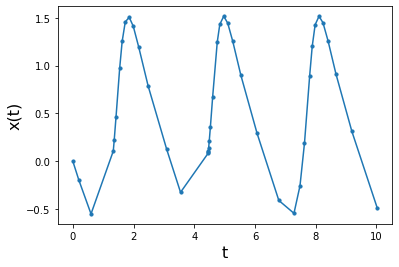

In [17]:
plt.plot(t, xt)
plt.scatter(t, xt, s=10)
plt.xlabel('t',size=16)
plt.ylabel('x(t)',size=16)
plt.show()

### Exercise. Solve system of ODEs with adaptive step RK4

1) Implement adaptive step in your rk4 function. 

2) Test your new code by solving again the system 

   ${dx/dt} = xy - x$

   $dy/dt = y - xy + sin^2(\omega t)$, 
   
   with $\omega = 1$. Initial time $t_0 = 0$. Final time $t_1 = 10$. Intial conditions $x(0)=y(0)=1$

3) Check the point spacing in the solution with a scatter plot 

In [18]:
specs = {'x0': [1. ,1.], 't0':0., 't1':10., 'h0': 0.001, 'tol': 1e-20}

def f(x,t):
    x1 = x[0]
    x2 = x[1]
    omega = 1.0
    f1 = x1*x2 - x1
    f2 = x2 - x1*x2 + np.sin(omega*t)**2
    return [f1,f2]

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def ark4(f,specs):
    # Solve ODE with 4th order Runge-Kutta
    ####
    def increment(f,x,t,h):
        k1 = h*np.array(f(x,t))
        k2 = h*np.array(f(x+0.5*k1,t+0.5*h))
        k3 = h*np.array(f(x+0.5*k2,t+0.5*h))
        k4 = h*np.array(f(x + k3, t + h))
        deltax = (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        return deltax
    # Setting up starting step and initial conditions
    h = (specs['h0'])
    x = np.array(specs['x0'],dtype='float')
    # Array in which the solution will be stored.
    # Start with one row and append rows at each succesful 
    # iteration. The number of columns is equal to the 
    # number of equations in the system
    xt = np.copy(x)
    # Array containing times at which the solution is computed
    t = specs['t0']
    ts = [ ]
    ts.append(t)
    while t < specs['t1']:
        #Find x1, increment twice by h
        dx1 = increment(f,x,t,h)
        x1 = x + dx1
        dx1 = increment(f,x1,t+h,h)
        x1 = x1 + dx1
        # Find x2, increment once by 2h
        dx2 = increment(f,x,t,2*h)
        x2 = x + dx2
        # Estimate error
        eps = (abs(x2-x1))/30.
        err = np.sqrt(np.sum(eps**2))
        # Compare error to target tolerance
        if (err <= 1e-60):
            # Avoid overflow in rho
            rho = 1.0
        else:
            rho = (specs['tol']*h)/err
        # Accepting or rejceting step, depending on whether
        # the error is below or above target.
        if (rho >= 1):
            # x1 is accepted
            # Update time
            t += 2*h
            # Update x
            x = x1
            #print(t,x)
            # Stacking x as a new row to array of solutions
            xt = np.vstack([xt,x])
            # Appending time step
            ts.append(t)
            # Updating step
            h = min(h*(rho**0.25),2.*h)
        elif (rho < 1.):
            # Not enough accuracy, stay in x 
            h = min(h*(rho**0.25),0.99999*h)
                  
    return np.array(ts), xt

In [20]:
specs = {'x0': [1. ,1.], 't0':0., 't1':10., 'h0': 0.1, 'tol': 1e-3}

def f(x,t):
    x1 = x[0]
    x2 = x[1]
    omega = 1.0
    f1 = x1*x2 - x1
    f2 = x2 - x1*x2 + np.sin(omega*t)**2
    return [f1,f2]

In [21]:
t, xt = ark4(f,specs)

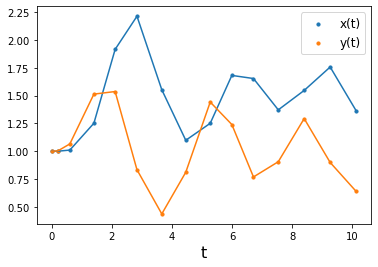

In [22]:
plt.plot(t,xt)
plt.scatter(t,xt[:,0],s = 10, label='x(t)')
plt.scatter(t,xt[:,1], s = 10, label='y(t)')
plt.legend(fontsize=12)
plt.xlabel('t',size=16)
plt.show()

### Exercise: Lotka-Volterra.

Use your rk4 or adaptive rk4 to solve the Lotka-Volterra system, describing the prey (y = "foxes") - predator (x = "rabbits") population dynamics:

$\dot{x} = \alpha x - \beta x y$

$ \dot{y} = \gamma x y - \delta y$

with $\alpha = 1$, $\beta = \gamma =0.5$, $\delta = 2$. Evolve the system from $t_0 = 0$ to $t_1 = 30$, starting from initial conditions $x_0 = y_0 = 2$,

In [23]:
def f(x,t):
    x1 = x[0]
    x2 = x[1]
    alpha = 1.
    beta = 0.5
    gamma=beta
    delta = 2
    f1 = alpha*x1 - beta*x1*x2
    f2 = gamma*x1*x2 - delta*x2
    return [f1,f2] 

specs = {'x0': [2. ,2.], 't0':0., 't1':30., 'h0': 0.1, 'tol': 1e-5}

# According to theory, the equilibrium point is at (x_0,y_0) = (delta/gamma, alpha/beta). Checking:
#specs = {'x0': [4. ,2.], 't0':0., 't1':30., 'h0': 0.1, 'tol': 1e-5}

t, xt = ark4(f,specs)

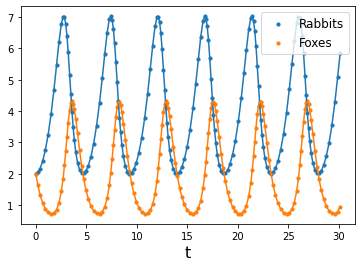

In [24]:
plt.plot(t,xt)
plt.scatter(t,xt[:,0], s = 10, label='Rabbits')
plt.scatter(t,xt[:,1], s = 10, label='Foxes')
plt.legend(fontsize=12)
plt.xlabel('t',size=16)
plt.show()

### Exercise. Cometary orbit. 

Use rk4 or adaptive rk4 to calculate the orbit of a comet with distance from sun at aphelion $d = 4 \times 10^9$ km and velocity at aphelion $v = 500$ m/s. 

In [25]:
import numpy as np
from matplotlib import pyplot as plt

def ark4(f,specs):
    # Solve ODE with 4th order Runge-Kutta
    ####
    def increment(f,x,t,h):
        k1 = h*np.array(f(x,t))
        k2 = h*np.array(f(x+0.5*k1,t+0.5*h))
        k3 = h*np.array(f(x+0.5*k2,t+0.5*h))
        k4 = h*np.array(f(x + k3, t + h))
        deltax = (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        return deltax
    # Setting up starting step and initial conditions
    h = (specs['h0'])
    x = np.array(specs['x0'],dtype='float')
    # Array in which the solution will be stored.
    # Start with one row and append rows at each succesful 
    # iteration. The number of columns is equal to the 
    # number of equations in the system
    xt = np.copy(x)
    # Array containing times at which the solution is computed
    t = specs['t0']
    ts = [ ]
    ts.append(t)
    while t < specs['t1']:
        #Find x1, increment twice by h
        dx1 = increment(f,x,t,h)
        x1 = x + dx1
        dx1 = increment(f,x1,t+h,h)
        x1 = x1 + dx1
        # Find x2, increment once by 2h
        dx2 = increment(f,x,t,2*h)
        x2 = x + dx2
        # Estimate error
        eps = (abs(x2-x1))/30.
        #err = np.sqrt(np.sum(eps**2))
        err = np.sqrt(eps[0]**2 + eps[2]**2)
        # Compare error to target tolerance
        if (err <= 1e-60):
            # Avoid overflow in rho
            rho = 1.0
        else:
            rho = (specs['tol']*h)/err
        # Accepting or rejecting step, depending on whether
        # the error is below or above target.
        if (rho >= 1):
            # x1 is accepted
            # Update time
            t += 2*h
            # Update x
            x = x1
            # Stacking x as a new row to array of solutions
            xt = np.vstack([xt,x])
            # Appending time step
            ts.append(t)
            # Updating step
            h = min(h*(rho**0.25),2.*h)
        elif (rho < 1.):
            # Not enough accuracy, stay in x 
            h = min(h*(rho**0.25),0.9999*h)
                  
    return np.array(ts), xt


def f(x,t):   
    
    G = 6.6743e-11  # Newton's constant 
    sec2years = 3.17098e-8
    m2km = 1e-3
    G = (G*m2km**3)/(sec2years**2) # converting sec to years and meters to km
    M = 1.98847e30  # Sun's mass  
    GM = G*M
    
    x1 = x[0] # x
    v1 = x[1] # vx
    x2 = x[2] # y
    v2 = x[3] # vy
    
    # Comet distance from the sun
    r = np.sqrt(x1**2. + x2**2.)
    # Array of derivatives
    f0 = v1                 # dx/dt = v
    f1 = -GM*x1/r**3        # dvx/dt -GM*x/r^3
    f2 = v2                 # dy/dt = vy
    f3 = -GM*x2/r**3        # dvy/dt = -GM*y/r^3
    
    return np.array([f0,f1,f2,f3])


# Setting initial conditions. Comet at aphelion
#################################################
# Calculating G*M in chosen units (distances in km and time in years)
G = 6.6743e-11  # Newton's constant 
sec2years = 3.17098e-8
m2km = 1e-3
G = (G*m2km**3)/(sec2years**2) # converting sec to years and meters to km
M = 1.98847e30  # Sun's mass  
GM = G*M

# Initial position (xi,yi), distances in km
xi  = 4e9
yi  = 0.
# Initial velocity (vx,vy), in km/yr
vx0 = 0.
sec2years = 3.17098e-8
# Velocity at aphelion
vy0 = 0.5/sec2years
# Major semi-axis (in km), derived from velocity and distnce at aphelion 
a = (2./xi - vy0**2/GM)**(-1)
# Calculating period of orbit (in years), from Kepler's third law
T = 2.*np.pi*np.sqrt((a**3)/GM)
print("T = ", T)

# Setting specs using results above. Setting tolerance in km/yr on comet position. Step in km.
# Integrating from 0 to T
specs = {'x0': [xi, 0., 0., vy0], 't0':0, 't1': T, 'h0': 1., 'tol': 1.}

t, xt = ark4(f,specs)

T =  49.194310439734046


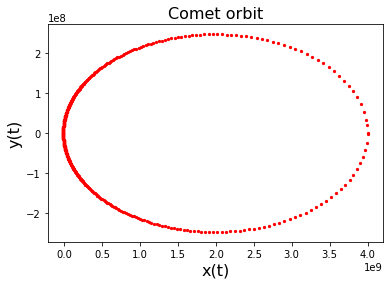

In [26]:
#plt.plot(xt[:,0], xt[:,2], linestyle='dashed')
plt.scatter(xt[:,0],xt[:,2],s=5, color='red')
plt.xlabel('x(t)',size=16)
plt.ylabel('y(t)',size=16)
plt.title('Comet orbit',size=16)
plt.show()

### Three-body problem

Consider three stars with masses $m_1 = 150$, $m_2 = 200$, $m_3 = 250$, starting at rest in positions $x_1 = (3,1)$, $x_2 = (-1,-2) $, $x_3 = (-1,1)$. Plot the orbits in the time interval $[0,2]$, using an adative step integrator. Take $G=1$.

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def ark4(f,specs):
    # Solve ODE with 4th order Runge-Kutta
    ####
    def increment(f,x,t,h):
        k1 = h*np.array(f(x,t))
        k2 = h*np.array(f(x+0.5*k1,t+0.5*h))
        k3 = h*np.array(f(x+0.5*k2,t+0.5*h))
        k4 = h*np.array(f(x + k3, t + h))
        deltax = (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        return deltax
    # Setting up starting step and initial conditions
    h = (specs['h0'])
    x = np.array(specs['x0'],dtype='float')
    # Array in which the solution will be stored.
    # Start with one row and append rows at each succesful 
    # iteration. The number of columns is equal to the 
    # number of equations in the system
    xt = np.copy(x)
    # Array containing times at which the solution is computed
    t = specs['t0']
    ts = [ ]
    ts.append(t)
    while t < specs['t1']:
        #Find x1, increment twice by h
        dx1 = increment(f,x,t,h)
        x1 = x + dx1
        dx1 = increment(f,x1,t+h,h)
        x1 = x1 + dx1
        # Find x2, increment once by 2h
        dx2 = increment(f,x,t,2*h)
        x2 = x + dx2
        # Estimate error
        eps = (abs(x2-x1))/30.
        err = np.sqrt(np.sum(eps**2))
        #err = np.sqrt(eps[0]**2 + eps[1]**2 + eps[2]**2 + eps[3]**2 + eps[4]**2 +eps[5]**2)
        # Compare error to target tolerance
        if (err <= 1e-60):
            # Avoid overflow in rho
            rho = 1.0
        else:
            rho = (specs['tol']*h)/err
        # Accepting or rejceting step, depending on whether
        # the error is below or above target.
        if (rho >= 1):
            # x1 is accepted
            # Update time
            t += 2*h
            # Update x
            x = x1
            # Stacking x as a new row to array of solutions
            xt = np.vstack([xt,x])
            # Appending time step
            ts.append(t)
            # Updating step
            h = min(h*(rho**0.25),2.*h)
        elif (rho < 1.):
            # Not enough accuracy, stay in x 
            h = min(h*(rho**0.25),0.9999*h)
                  
    return np.array(ts), xt



class star:

    def __init__(self,m,x,y,vx,vy):
        self.mass = m
        self.position = np.array([x,y],dtype='float')
        self.velocity = np.array([vx,vy],dtype='float')
      
    def acceleration(self,star2):
        m2 = star2.mass
        r1 = self.position
        r2 = star2.position
        dist = r1 - r2
        r = np.sqrt(np.sum(dist**2))
        a1 = m2*(r2-r1)/(r**3)
        return a1

def f(x,t):  
    # Input vector: x = [x1,y1,x2,y2,x3,y3,vx1,vy1,vx2,vy2,vx3,vy3]
    f = np.zeros(12)
    
    m1 = 150.
    m2 = 200.
    m3 = 250. 
    
    star1 = star(m1,x[0],x[1],x[6],x[7])
    star2 = star(m2,x[2],x[3],x[8],x[9])
    star3 = star(m3,x[4],x[5],x[10],x[11])
    stars = [star1,star2,star3]
        
    # Output vector: f = [vx1,vy1,vx2,vy2,vx3,vy3,ax1,ay1,ax2,ay2,ax3,ay3]
    for i in range(6,12):
        #print(i, x[i])
        f[i-6] = x[i]
    
    for i in range(len(stars)):
        #print(i)
        a = np.zeros(2,dtype='float')
        s1 = stars[i]
        for s2 in stars[:i]:
            a += s1.acceleration(s2)
        for s2 in stars[i+1:]:
            a += s1.acceleration(s2)    
        f[2*i+6] = a[0]
        f[2*i+7] = a[1]
        #print(2*i+6,a[0])
    
    return f

In [28]:
specs = {'x0': [3.,1.,-1.,-2.,-1.,1.,0.,0.,0.,0.,0.,0.], 't0':0., 't1': 4., 'h0': 0.01, 'tol': 1e-4}

t, xt = ark4(f,specs)

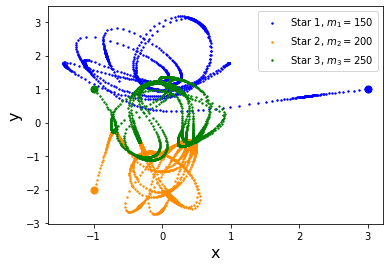

In [29]:
a = 0
b = len(t)
plt.scatter(xt[a:b,0],xt[a:b,1],s=2, label = 'Star 1, $m_1 = 150$', c = 'blue')
plt.scatter(xt[a:b,2],xt[a:b,3],s=2, label = 'Star 2, $m_2 = 200$',c = 'darkorange')
plt.scatter(xt[a:b,4],xt[a:b,5],s=2, label = 'Star 3, $m_3 = 250$',c='green')
plt.scatter(xt[0,0],xt[0,1],s=50,c='blue')
plt.scatter(xt[0,2],xt[0,3],s=50,c='darkorange')
plt.scatter(xt[0,4],xt[0,5],s=50,c='green')
#plt.plot(xt[a:b,0],xt[a:b,1], label = 'Star 1, $m_1 = 150$',c='blue')
#plt.plot(xt[a:b,2],xt[a:b,3], label = 'Star 2, $m_2 = 200$',c='darkorange')
#plt.plot(xt[a:b,4],xt[a:b,5], label = 'Star 3, $m_3 = 250$',c='green')
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.legend()
plt.show()

### Two body problem.

Solve the two body problem. Take G=1; set masses $m_1 = m_2 = 1$. Initial positions $x_1 = (1,0)$, $x_2 = (-1,0)$. Initial velocities $v_1=(-0.3,0.3)$, $v_2=(0.3,-0.3)$. Implement the midpoint method, following instructions in the slides.

In [30]:
specs = {'x0': [1.,0., -1.,0., -0.3,0.3,0.3,-0.3], 't0':0., 't1': 12., 'h': 0.001}


def midpoint_2body(specs):
    
    def acceleration(x):
        m1 = 1.
        m2 = 1.
        x1 = x[0]
        y1 = x[1]
        x2 = x[2]
        y2 = x[3]
        r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        ax1 = m2*(x2-x1)/(r**3)  # ax1 = dvx1/dt
        ay1 = m2*(y2-y1)/(r**3)  # ay1 = dvy1/dt
        ax2 = m1*(x1-x2)/(r**3)  # ax2 = dvx2/dt
        ay2 = m1*(y1-y2)/(r**3)  # ay2 = dvy2.dt
        return np.array([ax1,ay1,ax2,ay2])

        
    x0 = specs['x0']
    h = specs['h']
    t0 = specs['t0']
    t1 = specs['t1']
    
    x1 = x0[0]
    y1 = x0[1]
    x2 = x0[2]
    y2 = x0[3]
    
    x = np.array([x1,y1,x2,y2])
    
    vx1 = x0[4]
    vy1 = x0[5]
    vx2 = x0[6]
    vy2 = x0[7]
    
    v = np.array([vx1,vy1,vx2,vy2])
    
    times = [t0]
    y = np.copy(x0)
    
    t = t0
    
    while t<t1:
        
        a = acceleration(x)  # a(t)
        
        k1x = 0.5*h*v
        k1v = 0.5*h*a
        
        x1 = x + k1x   # x(t + h/2)
        
        a1 = acceleration(x1)  # a(t+h/2)
      
        k2x = h*(v + k1v)
        k2v = h*a1
        
        x += k2x 
        v += k2v
        
        t += h
        
        ynext = np.array([x[0],x[1],x[2],x[3],v[0],v[1],v[2],v[3]])
        y = np.vstack((y,ynext))
        times.append(t)
        
    return times, y

t, xt = midpoint_2body(specs) 

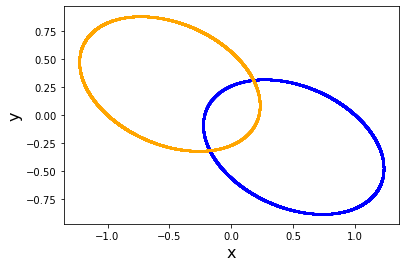

In [31]:
a = 0
b = len(t)
plt.scatter(xt[a:b,0],xt[a:b,1],s=2, label = 'Star 1, $m_1 = 1$', c = 'blue')
plt.scatter(xt[a:b,2],xt[a:b,3],s=2, label = 'Star 1, $m_1 = 1$', c = 'orange')
plt.xlabel('x',size = 16)
plt.ylabel('y',size=16)
plt.show()

### Earth's orbit. 

Use the Verlet method to calculate the orbit of the Earth around the sun. Verify energy conservation 

In [32]:
def f(x,t):   
    
    G = 6.6743e-11  # Newton's constant 
    sec2years = 3.17098e-8
    m2km = 1e-3
    G = (G*m2km**3)/(sec2years**2) # converting sec to years and meters to km
    M = 1.98847e30  # Sun's mass  
    GM = G*M
    
    x1 = x[0] # x
    x2 = x[1] # y
    
    r = np.sqrt(x1**2. + x2**2.)
    
    f0 = -GM*x1/r**3        # dvx/dt = -GM*x/r^3
    f1 = -GM*x2/r**3        # dvy/dt = -GM*y/r^3
    
    return np.array([f0,f1])


def verlet(f,specs): 

    x0 = np.array(specs['x0'])
    v0 = np.array(specs['v0'])
    t0 = specs['t0']
    t1 = specs['t1']
    h = specs['h']
    
    #Solution
    xt = np.copy(x0)
    vt = np.copy(v0)
    #Times at which the solution is computed
    times = [t0]
    t = t0
    
    # Energy
    G = 6.6743e-11  # Newton's constant 
    sec2years = 3.17098e-8
    m2km = 1e-3
    G = (G*m2km**3)/(sec2years**2) # converting sec to years and meters to km
    M = 1.98847e30  # Sun's mass  
    m = 5.9722e24   # Earth's mass
    GMm = G*M*m
    r = np.sqrt(np.sum(x0**2))
    Ep =  -GMm/r
    Ek = 0.5*m*np.sum(v0**2)
    Etot = [Ep+Ek]
    
    v1 = v0 + 0.5*h*f(x0,t0)  # v(t+h/2)
    x = np.copy(x0)
    x += h*v1                 
    
    while t < t1:
        t += h
        x += h*v1                  # x(t+h) = x(t) + h*v1
        k = h*f(x,t)               # k = h*f(x(t+h),t+h)
        v = v1 + 0.5*k             # v(t+h) = v(t+h/2) + k/2 
        v1 += k                    # v(t + 3h/2) = v(t+h/2) + k
        times.append(t)
        xt = np.vstack((xt,x))
        vt = np.vstack((vt,v))
        # Energy
        r = np.sqrt(np.sum(x**2))
        Ep = -GMm/r
        Ek = 0.5*m*np.sum(v**2)
        Etot.append(Ep+Ek)
    
    return times, xt, vt, Etot


xi = 1.471e8                  # Distance at perihelion in km
sec2years = 3.17098e-8
vy0 = -3.0287e1/sec2years     # Velocity at perihelion, km/yr

specs = {'x0': [xi, 0.], 'v0': [0., vy0], 't0':0, 't1': 10., 'h': 1e-4}

t, xt, vt, Etot = verlet(f,specs)

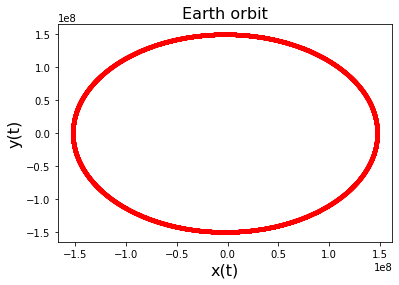

In [33]:
plt.scatter(xt[:,0],xt[:,1],s=5, color='red')
plt.xlabel('x(t)',size=16)
plt.ylabel('y(t)',size=16)
plt.title('Earth orbit',size=16)
plt.show()

[1.         0.99999956 0.99999956 0.99999956 0.99999956 0.99999956
 0.99999956 0.99999956 0.99999956 0.99999956]


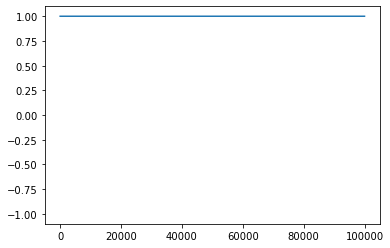

In [34]:
Econs = Etot/Etot[0]
print(Econs[0:10])
x = np.arange(len(Econs))
plt.ylim(-1.1,1.1)
plt.plot(x,Econs)
plt.show()

### Boundary value problems. Shooting method.

A ball is thrown in the air at t=0, starting at position (x,y) = (0,0), with initial horizontal velocity $v_x = 3$ m/s. The ball lands at $t_1 =10$ seconds. Calculate and plot the trajectory (neglect air resistance), following the solution steps below.

1) Write a function 'trajectory', that outputs the solution of the e.o.m.. Interface: def trajectory(v0,t), where v0 = [v0x, v0y] is the vector of initial velocity components and t is a vector containing the times at which the solution is evaluated. Assume the object starts at the origin of the coordinate system (x0,y0) = 0. Use the function scipy.integrate.odeint to solve the equation. Test your code by setting some arbitray initial conditions and plotting the resulting trajectory.  

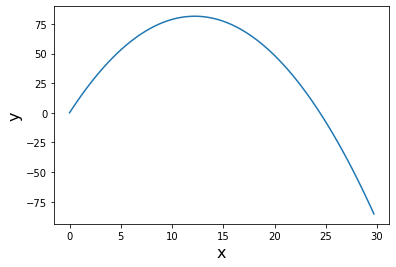

In [35]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def trajectory(v0,t):
    # Array of derivatives
    def f(x,t):
        g = -9.822
        f0 = x[2]
        f1 = x[3]
        f2 = 0.
        f3 = g
        return np.array([f0,f1,f2,f3])
    # Initial conditions
    v0x = v0[0]
    v0y = v0[1]
    y0 = np.array([0.,0.,v0x,v0y])
    # Integrate e.o.m.
    y = sp.integrate.odeint(f,y0,t) 
    return y

# Testing
################
v0 = [3.,40.]
# Times at which I sample x(t)
t = np.arange(0.,10.,0.1)
# Computing and plotting trajectories
y = trajectory(v0,t)
plt.plot(y[:,0],y[:,1])
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.show()

2) Write a function 'height(v0y)', that takes the initial ball vertical velocity in input and outputs the height of the ball after 10 sec. To do this, use the function trajectory you wrote earlier, with suitable initial conditions.

In [36]:
import scipy.optimize as opt

def height(v0y):
    v0x = 0.
    v0 = np.array([v0x,v0y],dtype='float')
    t = np.arange(0.,11.,10.)
    y = trajectory(v0,t)
    return y[1,1]

3) Find the (non-zero) root of the function 'height', using scipy.optimize.root_scalar and the bisection method. This corresponds to the initial velocity for which the ball lands after 10 seconds. Check your result by plotting the final solution, with $v_0x = 3$ m/s

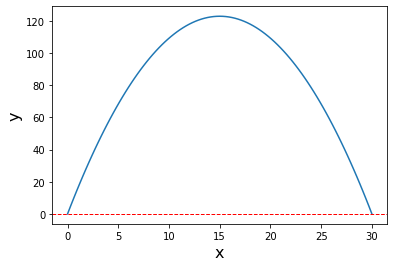

In [37]:
# Finding root
a = 0.
b = 500.
root = opt.root_scalar(height, method='bisect', bracket=[a,b])

# Calculating and plotting solution
vx = 3.
vy = root.root
v0 = np.array([vx,vy],dtype='float')
t = np.arange(0.,10.1,0.1)
y = trajectory(v0,t)

plt.plot(y[:,0],y[:,1])
plt.axhline(linestyle='dashed',color = 'red',lw=1)
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.show()

### Stiff equations, an example

Consider the linear system:

$u' = 998 u + 1998 v$

$v' = -999 u - 1999 v$,

with $u(0) = 1$, $v(0) = 0$


The analytical solution is:

$u = 2 e^{-x} - e^{-1000 x}$

$v = - e^{-x} + e^{-1000 x}$

#### 1) Solution attempt with standard RK methods (Euler method below).

Using 1000 points in the interval  

<ipython-input-38-59f2c2334d6e>:7: RuntimeWarning: overflow encountered in double_scalars
  f0 = 998.*u + 1998*v
<ipython-input-38-59f2c2334d6e>:7: RuntimeWarning: invalid value encountered in double_scalars
  f0 = 998.*u + 1998*v
<ipython-input-38-59f2c2334d6e>:8: RuntimeWarning: overflow encountered in double_scalars
  f1 = -999.*u + -1999*v
<ipython-input-38-59f2c2334d6e>:8: RuntimeWarning: invalid value encountered in double_scalars
  f1 = -999.*u + -1999*v


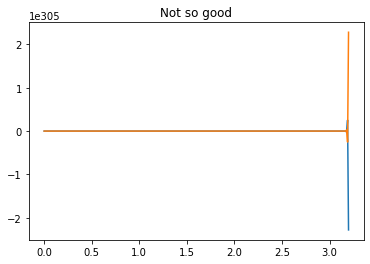

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,t):
    u = x[0]
    v = x[1]
    f0 = 998.*u + 1998*v
    f1 = -999.*u + -1999*v
    return np.array([f0,f1],dtype='float')

###################################################
def rk1(f,specs):
    # Solve ODE with Euler method
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = np.array(specs['x0'],dtype='float')
    Nequations = x.size
    xt = np.zeros((specs['N']+1,Nequations),dtype='float')
    xt[0,:] = x
    ts = np.arange(specs['t0'],specs['t1'],h)
    for i in range(len(ts)):
        t = ts[i]
        x += h*np.array(f(x,t))
        xt[i+1,:] = x
    return ts, xt[:-1]

def rk4(f,specs):
     # Solve ODE with 4th order Runge Kutta method
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = specs['x0']
    xt = []
    xt.append(x)
    ts = np.arange(specs['t0'],specs['t1'],h)
    for t in ts:
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x + k3, t + h)
        x += (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        xt.append(x)
    
    return ts, xt[:-1]
#########################################################

specs = {'x0': [1. ,0.], 't0':0., 't1':10., 'N': 1000}

t, xt = rk1(f,specs)

plt.plot(t,xt)
plt.title('Not so good')
plt.show()

#### 2) We now try to solve it using scipy.integrate.odeint.

Using 100 points in the same interval

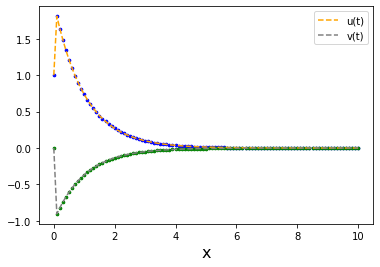

In [39]:
import scipy as sp

# Analytical solution
t = np.arange(0,10.1,0.1)
u = 2.*np.exp(-t) - np.exp(-1000*t)
v = -np.exp(-t) + np.exp(-1000*t)
# Numerical solution via scipy odeint
y0 = np.array([1.,0.])
y = sp.integrate.odeint(f,y0,t) 
# Plotting numerical vs analytical solution
plt.scatter(t,y[:,0],s=7,color = 'blue')
plt.scatter(t,y[:,1],s=7,color='green')
plt.plot(t,u,color='orange',linestyle='dashed',label='u(t)')
plt.plot(t,v,color='grey',linestyle='dashed',label='v(t)')
plt.xlabel('x',size=16)
plt.legend()
plt.show()

#### 3) We also try to implement a simple, implicit Euler scheme

In [40]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

def iRK1(fprime,y0,t):
    h = t[1] - t[0]
    Nequations = len(y0)
    y = np.copy(y0)
    yn = np.copy(y0)
    one = np.identity(Nequations)
    for i in range (len(t) - 1):
        ynext = solve(one - h*fprime,yn)
        y = np.vstack((y,ynext))
        yn = np.copy(ynext)
    
    return y

In [41]:
fprime = np.array( [[998.,1998.],[-999.,-1999.]],dtype='float' )
y0 = np.array([1.,0.])
t = np.arange(0.,10.1,0.1)
y = iRK1(fprime,y0,t)

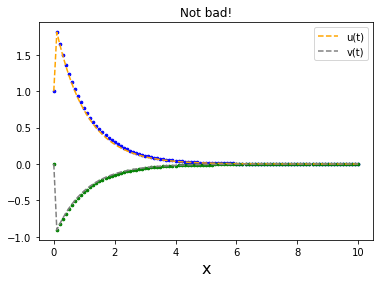

In [42]:
u = 2.*np.exp(-t) - np.exp(-1000*t)
v = -np.exp(-t) + np.exp(-1000*t)
plt.scatter(t,y[:,0],s=7,color = 'blue')
plt.scatter(t,y[:,1],s=7,color='green')
plt.plot(t,u,color='orange',linestyle='dashed',label='u(t)')
plt.plot(t,v,color='grey',linestyle='dashed',label='v(t)')
plt.xlabel('x',size=16)
plt.legend()
plt.title('Not bad!')
plt.show()

#### 4) Checking why the simple implicit Euler method above was stable.

We know that the stability condition is 

1) For the explicit (forward) Euler method: $h < 2/\lambda_{max}$, where $\lambda_{max}$ is the highest eigenvalue of minus the array of derivatives.

2) For the implicit method we have to satisfy $|1 + h \lambda_i|^{-1} < 1$

Therefore we want to start by computing the eigenvalues of 'fprime'.

In [43]:
import numpy.linalg as linalg

# Matrix of derivatives
fprime = np.array( [[998.,1998.],[-999.,-1999.]],dtype='float' )
# Finding and printing eigenvalues
eigenvalues = linalg.eig(-fprime)

print('lambda 1 = ', eigenvalues[0][0])
print('lambda 2 = ', eigenvalues[0][1])

lambda 1 =  1.0
lambda 2 =  1000.0


Therefore we see that the implicit method is always stable, whereas the forward method requires at least $h \sim 10^{-3}$, corresponding to $\sim 10000$ points in the $t = [0,10]$ interval in which we are solving the ODE. Let us conclude by checking that forward RK1 with $10000$ points is indeed stable.

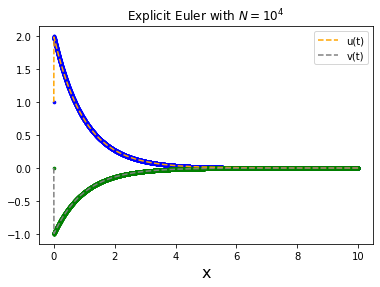

In [44]:
specs = {'x0': [1. ,0.], 't0':0., 't1':10., 'N': 10000}

t, xt = rk1(f,specs)

u = 2.*np.exp(-t) - np.exp(-1000*t)
v = -np.exp(-t) + np.exp(-1000*t)
plt.scatter(t,xt[:,0],s=7,color = 'blue')
plt.scatter(t,xt[:,1],s=7,color='green')
plt.plot(t,u,color='orange',linestyle='dashed',label='u(t)')
plt.plot(t,v,color='grey',linestyle='dashed',label='v(t)')
plt.xlabel('x',size=16)
plt.legend()
plt.title('Explicit Euler with $N=10^4$')
plt.show()

## The Bulirsch-Stoer method

In the following we are going to implement the Bulirsch-Stoer method and apply is to the solution of a few numerical problems

### Exercise. Implement an ODE solver which uses the Bulirsch-Stoer method

#### 1. Start by implementing the modified mid-point method and test it with a few examples that were studied earlier

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def MMP(f,y0,h,interval):
    # Modified midpoint method
    # Time interval
    t0 = interval[0]
    t1 = interval[1]
    # Initial conditions
    xstart = np.atleast_1d(y0)
    # Number of equations in the system
    # (length of equation vector)
    Neq = len(xstart)
    # Initializing arrays with solutions x,y
    x = np.zeros((1,Neq),dtype='float')
    x[0,:] = np.copy(xstart)
    y = np.zeros( (1,Neq),dtype='float')
    y[0,:] = x + 0.5*h*f(xstart,t0)
    # Array contianing times at which the solution 
    # is computed
    t = [ ]
    t.append(t0)
    Nsteps = int( (t1-t0)/h )
    for i in range(Nsteps):
        #print(i,y[i])
        xnext = x[i] + h*f(y[i],t[i]+0.5*h)
        #print(xnext)
        ynext = y[i] + h*f(xnext,t[i]+h)
        tnext = t[i] + h
        y = np.vstack( (y,ynext) )
        x = np.vstack( (x,xnext) )
        t.append(tnext)
    # Last step average
    x[Nsteps,:] = 0.5*( x[Nsteps,:] + y[Nsteps-1,:] + 0.5*h*f(x[Nsteps,:],t1) )
    return np.array(t), x

a) Testing MMP with system of equations used for initial test of RK methods

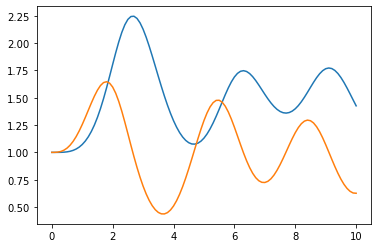

In [46]:
y0 = [1., 1.]
t0 = 0.
t1 = 10.
interval = [t0,t1]
h = 0.1

def f(x,t):
    x1 = x[0]
    x2 = x[1]
    omega = 1.0
    f1 = x1*x2 - x1
    f2 = x2 - x1*x2 + np.sin(omega*t)**2
    return np.array([f1,f2],dtype='float')

ts,xt = MMP(f,y0,h,interval)

plt.plot(ts,xt)
plt.show()

b) Testing MMP with Lotka-Volterra

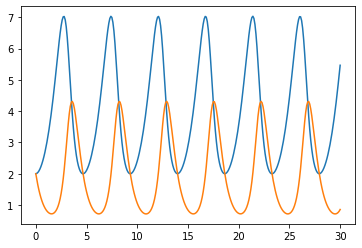

In [47]:
def f(x,t):
    x1 = x[0]
    x2 = x[1]
    alpha = 1.
    beta = 0.5
    gamma=beta
    delta = 2
    f1 = alpha*x1 - beta*x1*x2
    f2 = gamma*x1*x2 - delta*x2
    return np.array([f1,f2])

specs = {'x0': [2. ,2.], 't0':0., 't1':30., 'h0': 0.1, 'tol': 1e-2}

t0 = specs['t0']
t1 = specs['t1']
interval = [t0,t1]
h = specs['h0']

y0 = specs['x0']


ts,xt = MMP(f,y0,h,interval)

plt.plot(ts,xt)
plt.show()

#### 2) Now use function MMP as a building block for Burlisch-Stoer. 

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def MMP(f,y0,h,interval):
    # Modified midpoint method
    # Time interval
    t0 = interval[0]
    t1 = interval[1]
    # Initial conditions
    xstart = np.atleast_1d(y0)
    # Number of equations in the system
    # (length of equation vector)
    Neq = len(xstart)
    # Initializing arrays with solutions x,y
    x = np.zeros((1,Neq),dtype='float')
    x[0,:] = np.copy(xstart)
    y = np.zeros( (1,Neq),dtype='float')
    y[0,:] = x + 0.5*h*f(xstart,t0)
    # Array containing times at which the solution 
    # is computed
    t = [ ]
    t.append(t0)
    Nsteps = int( (t1-t0)/h )
    for i in range(Nsteps):
        xnext = x[i] + h*f(y[i],t[i]+0.5*h)
        ynext = y[i] + h*f(xnext,t[i]+h)
        tnext = t[i] + h
        y = np.vstack( (y,ynext) )
        x = np.vstack( (x,xnext) )
        t.append(tnext)
    # Last step average
    x[Nsteps,:] = 0.5*( x[Nsteps,:] + y[Nsteps-1,:] + 0.5*h*f(x[Nsteps,:],t1) )
    return x[Nsteps,:]


def BST(deriv,errfunc,y0,t,tol):
    # Bulirsch-Stoer ODE solver
    Nbins = len(t) - 1
    x0 = np.atleast_1d(y0)
    Neq = len(x0)
    x = np.zeros((Nbins+1,Neq),dtype='float')
    x[0,:] = x0
    for i in range(Nbins):
        #print(i, Nbins)
        H = t[i+1] - t[i]
        h = H
        interval = (t[i],t[i+1])
        R1 = [ ]
        R1.append(MMP(deriv,y0,h,interval))
        n = 1
        error = H*tol + 1.
        while (error > H*tol):
            n = n + 1
            h = h/2.
            R2 = [ ]
            R2.append(MMP(deriv,y0,h,interval))
            for m in range(1,n):
                j = m-1
                fact = (n/(n-1))**(2.*m) - 1.
                delta = (R2[j] - R1[j])/(fact)
                Rnext = R2[j] + delta
                R2.append(Rnext)
            error = errfunc(delta)
            R1 = R2
            #print(n, R1)
        x[i+1,:] = R1[n-1]
        y0 = x[i+1,:]       
    return x   

a) Test the code, again with Lotka-Volterra

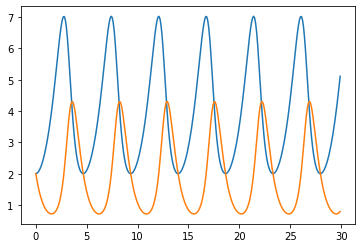

In [49]:
def f(x,t):
    x1 = x[0]
    x2 = x[1]
    alpha = 1.
    beta = 0.5
    gamma=beta
    delta = 2
    f1 = alpha*x1 - beta*x1*x2
    f2 = gamma*x1*x2 - delta*x2
    return np.array([f1,f2])

specs = {'x0': [2. ,2.], 't0':0., 't1':30., 'h0': 0.1, 'tol': 1e-2}

t0 = specs['t0']
t1 = specs['t1']
h = specs['h0']
t = np.arange(t0,t1,h)
tol = specs['tol']

y0 = specs['x0']

def err(delta):
    error = max(delta[0],delta[1])
    return error

xt = BST(f,err,y0,t,tol)

plt.plot(t,xt[:,0])
plt.plot(t,xt[:,1])
plt.show()

#### Exercise. Test the Bulirsch-Stoer solver by integrating the equation of motion of a nonlinear pendulum. 

$\large\frac{d^2 \Theta}{d t^2} = -\frac{g}{\ell} \sin{\Theta}$

Consider a pendulum of length $10$ cm, with initial conditions $\Theta_0 = 179^{{\rm o}}$ and $\omega_0 = 0$.

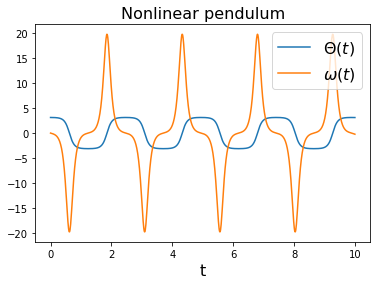

In [50]:
def err(delta):
    error = delta[1]
    return error

def pendulum(x,t):
    g = 9.81
    l = 0.1
    theta = x[0]
    omega = x[1]
    f0 = omega  #d(theta)/dt
    f1 = -(g/l)*np.sin(theta) # d(omega)/dt
    #f1 = -(g/l)*theta
    return np.array([f0,f1])

y0 = [3.1241,0.]
t = np.arange(0.,10,0.01)
tol = 1e-8
xt = BST(pendulum,err,y0,t,tol)

#print(2*np.pi*np.sqrt(0.1/9.8))

plt.plot(t,xt[:,0],label='$\Theta(t)$')
plt.plot(t,xt[:,1],label='$\omega(t)$')
plt.title('Nonlinear pendulum',size=16)
plt.xlabel('t',size=16)
plt.legend(fontsize=16)
plt.show()

#### Exercise. Planetary orbits

Calculate and plot the orbits of Earth and Pluto

- Distance at perhielion:

  Earth: $1.4710 \times 10^11$ m  
  Pluto: $4.4368 \times 10^12$ m
  
  
- Velocity at Perhielion:

  Earth: $3.0287 \times 10^4$ m/s  
  Pluto: $6.1218 \times 10^3$ m/s  
  
For both planets, calculate at least a full orbital period with an accuracy of 1 km/year. For the earth, take steps of one week. For Pluto, adjusts the step to keep the computational time reasonable, with the same accuracy.  

Mass of the sun: $M = 1.9891  \times 10^{30}$ kg; Newton's constant $G = 6.6738 \times 10^{-11} \, {\rm m}^3 {\rm kg}^{-1} {\rm s}^{-2}$  

In [51]:
def f(x,t):   
    
    G = 6.6743e-11  # Newton's constant 
    sec2years = 3.17098e-8
    m2km = 1e-3
    G = (G*m2km**3)/(sec2years**2) # converting sec to years and meters to km
    M = 1.98847e30  # Sun's mass  
    GM = G*M
    
    x1 = x[0] # x
    x2 = x[1] # y
    v1 = x[2] # vx
    v2 = x[3] # vy
    
    # Comet distance from the sun
    r = np.sqrt(x1**2. + x2**2.)
    # Array of derivatives
    f0 = v1                 # dx/dt = vx
    f1 = v2                 # dy/dt = vy
    f2 = -GM*x1/r**3        # dvx/dt -GM*x/r^3
    f3 = -GM*x2/r**3        # dvy/dt = -GM*y/r^3
    
    return np.array([f0,f1,f2,f3])


def err(delta):
    error = np.sqrt(delta[0]**2 + delta[1]**2)
    return error


# Pluto's orbit
xi = 1.471e8   

#### Earth's orbit

In [52]:
# Earth's orbit
xi = 1.471e8                  # Distance at perihelion in km
sec2years = 3.17098e-8
vy0 = -3.0287e1/sec2years     # Velocity at perihelion, km/yr
y0 = [xi,0.,0.,vy0]
t = np.arange(0.,1.02,0.02)
tol = 1. # Tolerance: 1km/yr

xt = BST(f,err,y0,t,tol)

#### Pluto's orbit

In [53]:
# Pluto's orbit

xi = 4.4368e9                # Distance at perihelion in km
sec2years = 3.17098e-8
vy0 = -6.1218/sec2years     # Velocity at perihelion, km/yr
y0 = [xi,0.,0.,vy0]
t = np.arange(0.,250,0.1)
tol = 1. # Tolerance: 1km/yr

yt = BST(f,err,y0,t,tol)

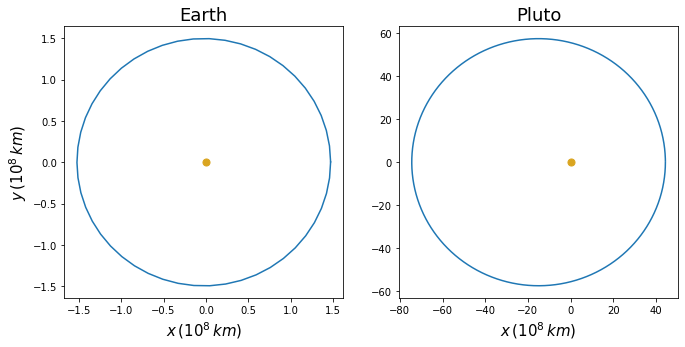

In [54]:
fig, axs = plt.subplots(1,2,figsize=(11,5))
axs[0].plot(xt[:,0]/1e8,xt[:,1]/1e8,label='Earth')
axs[1].plot(yt[:,0]/1e8,yt[:,1]/1e8,label='Pluto')
axs[0].set_xlabel('$x \, (10^8 \, km)$',fontsize = 15)
axs[1].set_xlabel('$x \, (10^8 \, km)$',fontsize = 15)
axs[0].set_ylabel('$y \, (10^8 \, km)$',fontsize =15)
axs[0].set_title('Earth',size=18)
axs[1].set_title('Pluto',size=18)
#axs[1].set_xlim(-80,60)
#axs[1].set_ylim(-60,60)
axs[0].scatter(0.,0.,s=50,c='goldenrod')
axs[1].scatter(0.,0.,s=50,c='goldenrod')
plt.show()